<a href="https://colab.research.google.com/github/abigailazeda/climate-ai-visualization/blob/main/AI_Augmented_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload CSV files

In [ ]:
# Langkah 1: Upload File CSV dari NASA GISTEMP v4
from google.colab import files
uploaded = files.upload()


Saving GLB.Ts+dSST (1).csv to GLB.Ts+dSST (1).csv


Read anda Data pre-process

Read CSV and Process annual Temp

In [ ]:
import pandas as pd

df = pd.read_csv("GLB.Ts+dSST (1).csv", skiprows=1)

In [ ]:
df = df.rename(columns={"Year": "Year", "J-D": "AnnualMean"})

In [ ]:
df = df[["Year", "AnnualMean"]]

In [ ]:
df = df[df["AnnualMean"] != "***"]
df["AnnualMean"] = df["AnnualMean"].astype(float)

/tmp/ipython-input-8-857080056.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["AnnualMean"] = df["AnnualMean"].astype(float)


In [ ]:
df.head(10)

,Year,AnnualMean
0,1880,-0.17
1,1881,-0.09
2,1882,-0.11
3,1883,-0.18
4,1884,-0.28
5,1885,-0.33
6,1886,-0.31
7,1887,-0.36
8,1888,-0.17
9,1889,-0.11


Annyal Graphic Visualization

In [ ]:
import matplotlib.pyplot as plt


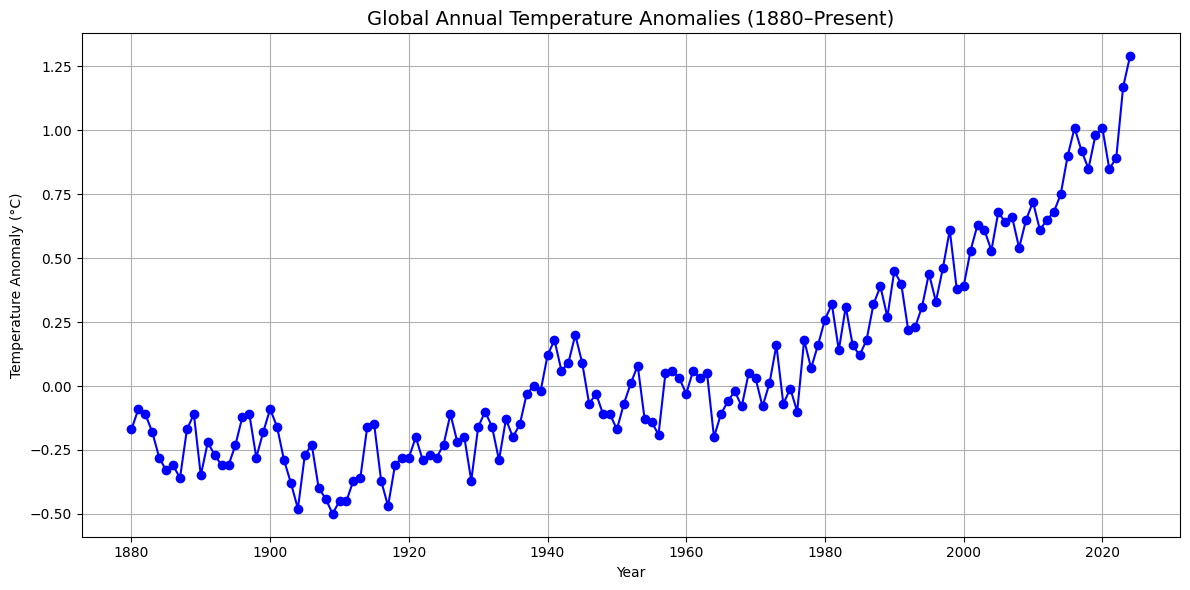

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df["Year"], df["AnnualMean"], marker='o', linestyle='-', color='blue')
plt.title("Global Annual Temperature Anomalies (1880–Present)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()


Anomaly and Trend Detection


Adding Linear Regression

In [ ]:
import numpy as np

In [ ]:
x = df["Year"].values
y = df["AnnualMean"].values

In [ ]:
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

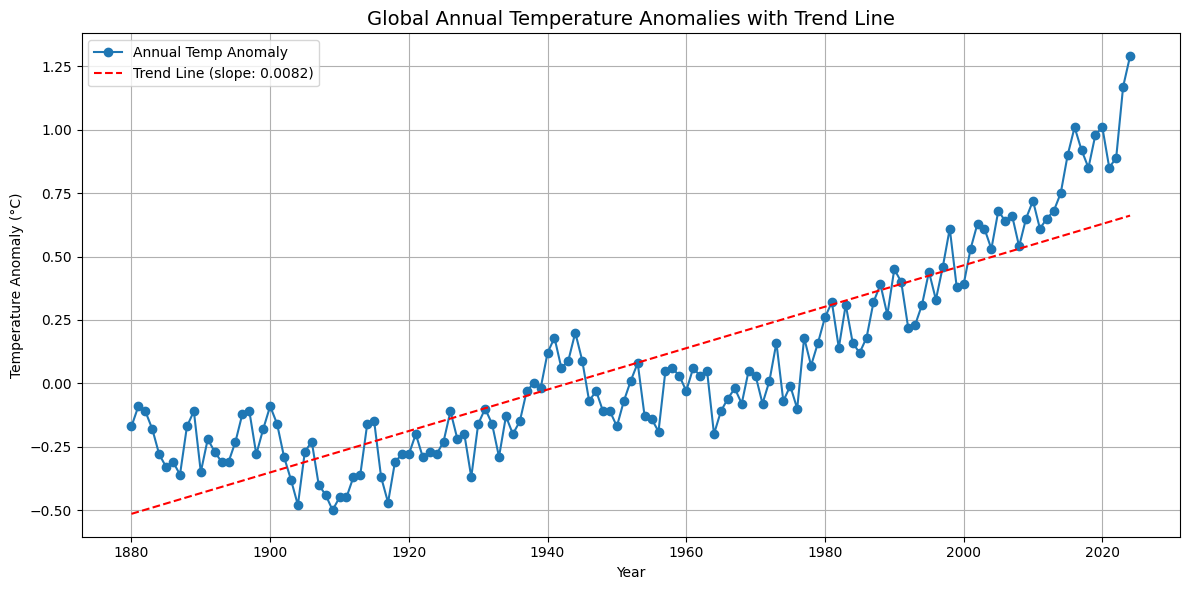

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(x, y, marker='o', linestyle='-', label="Annual Temp Anomaly")
plt.plot(x, p(x), "r--", label=f"Trend Line (slope: {z[0]:.4f})")
plt.title("Global Annual Temperature Anomalies with Trend Line", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Anomaly Temperature Detection

In [ ]:
threshold = 0.9
anomaly_years = df[df["AnnualMean"] >= threshold]

In [ ]:
print("Year with extreme temperatures(≥ 0.9°C):")
print(anomaly_years)

Year with extreme temperatures(≥ 0.9°C):
     Year  AnnualMean
135  2015        0.90
136  2016        1.01
137  2017        0.92
139  2019        0.98
140  2020        1.01
143  2023        1.17
144  2024        1.29


Automatic Naration Simulation

Extracting key information from trend data.

In [ ]:
slope = z[0]
first_year = df["Year"].min()
last_year = df["Year"].max()
first_temp = df[df["Year"] == first_year]["AnnualMean"].values[0]
last_temp = df[df["Year"] == last_year]["AnnualMean"].values[0]
anomaly_years_list = anomaly_years["Year"].tolist()

Creating Automatic Narative

In [ ]:
narrative = f"""
Global surface temperature anomalies have shown a consistent upward trend from {first_year} to {last_year},
with an average increase rate of approximately {slope:.4f}°C per year. In {first_year},
the global temperature anomaly was {first_temp:.2f}°C, whereas by {last_year}, it had reached {last_temp:.2f}°C.

Extreme temperature anomalies (≥ 0.9°C) were recorded in the years {', '.join(map(str, anomaly_years_list))}.
This pattern suggests an accelerated warming trend in the 21st century, especially after 2015,
indicating the urgent need for global climate action.
"""

print(narrative.strip())

Global surface temperature anomalies have shown a consistent upward trend from 1880 to 2024, 
with an average increase rate of approximately 0.0082°C per year. In 1880, 
the global temperature anomaly was -0.17°C, whereas by 2024, it had reached 1.29°C.

Extreme temperature anomalies (≥ 0.9°C) were recorded in the years 2015, 2016, 2017, 2019, 2020, 2023, 2024. 
This pattern suggests an accelerated warming trend in the 21st century, especially after 2015, 
indicating the urgent need for global climate action.
